In [1]:
import pandas as pd
import tweepy
import re
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bearer_token='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxclient = tweepy.Client(bearer_token=bearer_token)

# Replace user ID
id = None
user_data = client.get_users(usernames='BillGates')
for i in user_data.data:
    id = i["id"]
tweets = client.get_users_tweets(id=id, tweet_fields=['context_annotations','created_at','geo'],max_results=100)
count =1
posts = tweets.data
tweet_data = {
    "tweets":[]
}
for i in posts:
    tweet_data["tweets"].append(i["text"])
    count+=1

In [3]:
tweet_data

{'tweets': ["I love learning about the brain. Here’s cool research on the brain's GPS. https://t.co/xTfACQo6T8",
  'This is the toughest question I’ve ever had to answer: https://t.co/IavkgCqAyI https://t.co/zWSO9I82CU',
  'What a run. @serenawilliams will be leaving behind an extraordinary tennis career that challenged the double standard between male and female players. I look forward to watching her continue building her amazing legacy off the court. https://t.co/K9Hxa2jB3I',
  'This Nerd(le)’s day was just made. https://t.co/xObbTtT7Ia',
  'Interesting research on public perception of climate change. https://t.co/Ut7hWPDuaM',
  'If you’ve played Wordle, you know how important your first guess is. Here’s my strategy: https://t.co/Ib2QnrNlN2 https://t.co/6lr48HYmnd',
  'Here’s how I’ve started every day since February. #Wordle https://t.co/8auJgykTqa https://t.co/17cb9SiBu8',
  'Life is more fun when you have a friend like Warren. Happy 92nd birthday! https://t.co/aTxxMk2iyL',
  'Sum

In [4]:
df = pd.DataFrame(tweet_data)

In [5]:
df

,tweets
0,I love learning about the brain. Here’s cool r...
1,This is the toughest question I’ve ever had to...
2,What a run. @serenawilliams will be leaving be...
3,This Nerd(le)’s day was just made. https://t.c...
4,Interesting research on public perception of c...
...,...
95,When most people think about what produces gre...
96,The Power by @NaomiAllthenews raises timely qu...
97,Important guidance from @TheADDF founder @a_hf...
98,My advice is simple: read a lot and discover a...


In [6]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0-9]+',' ',text)
    text = re.sub('#',' ',text)
    text = re.sub('RT[\s]+',' ',text)
    text = re.sub('https?:\/\/\S+',' ',text)
    return text

In [7]:
df['tweets']=df['tweets'].apply(cleanTxt)

In [8]:
df.head()

,tweets
0,I love learning about the brain. Here’s cool r...
1,This is the toughest question I’ve ever had to...
2,What a run. will be leaving behind an extrao...
3,This Nerd(le)’s day was just made.
4,Interesting research on public perception of c...


In [9]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [10]:
df["subjectivity"] = df['tweets'].apply(getSubjectivity)

In [11]:
df['polarity'] = df['tweets'].apply(getPolarity)

In [12]:
df.head()

,tweets,subjectivity,polarity
0,I love learning about the brain. Here’s cool r...,0.625000,0.42500
1,This is the toughest question I’ve ever had to...,0.000000,0.00000
2,What a run. will be leaving behind an extrao...,0.409524,0.07619
3,This Nerd(le)’s day was just made.,0.000000,0.00000
4,Interesting research on public perception of c...,0.283333,0.25000


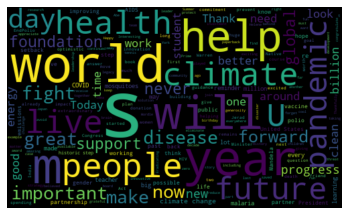

In [13]:
allwords = " ".join([twts for twts in df['tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [21]:
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)
wordCloud

In [14]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score==0:
        return "Neutral"
    else:
        return "Positive"


In [15]:
df["Analysis"] = df["polarity"].apply(getAnalysis)

In [16]:
df.head()

,tweets,subjectivity,polarity,Analysis
0,I love learning about the brain. Here’s cool r...,0.625000,0.42500,Positive
1,This is the toughest question I’ve ever had to...,0.000000,0.00000,Neutral
2,What a run. will be leaving behind an extrao...,0.409524,0.07619,Positive
3,This Nerd(le)’s day was just made.,0.000000,0.00000,Neutral
4,Interesting research on public perception of c...,0.283333,0.25000,Positive


In [17]:
polar =df['polarity']
subject = df['subjectivity']

In [56]:
output=[]
sentiments = ["Negative","Neutral","Positive"]
for i in sentiments:
    data = []
    dicts = {}
    dicts["name"]=i
    for x,y in zip(df[df['Analysis']==i]["polarity"],df[df['Analysis']==i]["subjectivity"]):
        li = [x,y]
        data.append(li)
    dicts["data"]=data
    output.append(dicts)
print(output)

[{'name': 'Negative', 'data': [[-0.2, 0.1], [-0.125, 0.625], [-0.04999999999999999, 0.95], [-0.125, 0.125], [-0.325, 0.6000000000000001], [-0.044444444444444425, 0.3833333333333333], [-0.0625, 0.3375], [-0.16666666666666666, 0.06666666666666667], [-0.07777777777777779, 0.20694444444444446], [-0.2333333333333333, 0.26666666666666666]]}, {'name': 'Neutral', 'data': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.5], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.46666666666666673], [0.0, 0.5], [0.0, 0.0], [0.0, 0.0], [0.0, 0.8333333333333334], [0.0, 0.125], [0.0, 0.0]]}, {'name': 'Positive', 'data': [[0.425, 0.625], [0.07619047619047621, 0.4095238095238095], [0.25, 0.2833333333333333], [0.325, 0.6666666666666666], [0.6, 0.5666666666666667], [0.25, 0.3125], [0.5, 0.5], [0.225, 0.26666666666666666], [0.07777777777777778, 0.9444444444444445], [0.25, 0.4], [0.4, 0.5416666666666667], [0.3, 0.32222222222222224], [0.18333333333333335, 0.45555555555555555], [0.21111111111111114

In [51]:
df[df['Analysis']=="Positive"]

AttributeError: 'DataFrame' object has no attribute 'value'

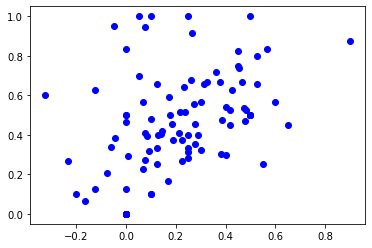

In [18]:
plt.scatter(polar,subject,color="Blue")

<AxesSubplot:xlabel='polarity', ylabel='subjectivity'>

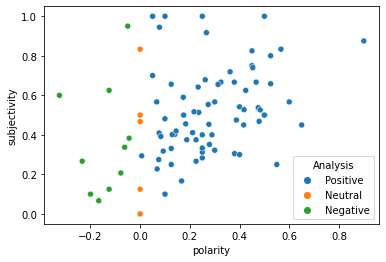

In [19]:
sns.scatterplot(data=df, x="polarity", y="subjectivity", hue="Analysis")

<AxesSubplot:xlabel='Analysis', ylabel='polarity'>

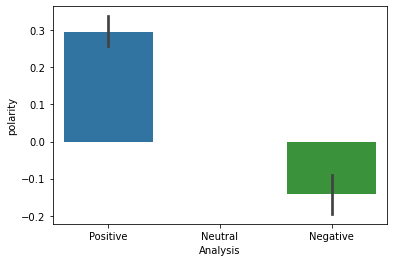

In [20]:
sns.barplot(x="Analysis",y="polarity",data=df)

In [68]:
(df[df['Analysis']=="Positive"]["Analysis"].count()/df["Analysis"].count())*100

74.0